# Import dependencies

In [21]:
!pip install pandas scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
# Import Pandas library for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

In [30]:
# Mount Google Drive to access data file (if data file is stored in Google Drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Read data from CSV file
humidity_data = pd.read_csv('/content/drive/MyDrive/weather_data/humidity.csv')

# Show the first 5 rows of data
print(humidity_data.head())

              datetime  Vancouver  Portland  San Francisco  Seattle  \
0  2012-10-01 12:00:00        NaN       NaN            NaN      NaN   
1  2012-10-01 13:00:00       76.0      81.0           88.0     81.0   
2  2012-10-01 14:00:00       76.0      80.0           87.0     80.0   
3  2012-10-01 15:00:00       76.0      80.0           86.0     80.0   
4  2012-10-01 16:00:00       77.0      80.0           85.0     79.0   

   Los Angeles  San Diego  Las Vegas  Phoenix  Albuquerque  ...  Philadelphia  \
0          NaN        NaN        NaN      NaN          NaN  ...           NaN   
1         88.0       82.0       22.0     23.0         50.0  ...          71.0   
2         88.0       81.0       21.0     23.0         49.0  ...          70.0   
3         88.0       81.0       21.0     23.0         49.0  ...          70.0   
4         88.0       81.0       21.0     23.0         49.0  ...          69.0   

   New York  Montreal  Boston  Beersheba  Tel Aviv District  Eilat  Haifa  \
0       N

In [7]:
# Read data from CSV file
temperature_data = pd.read_csv('/content/drive/MyDrive/weather_data/temperature.csv')

# Show the first 5 rows of data
print(temperature_data.head())

              datetime   Vancouver    Portland  San Francisco     Seattle  \
0  2012-10-01 12:00:00         NaN         NaN            NaN         NaN   
1  2012-10-01 13:00:00  284.630000  282.080000     289.480000  281.800000   
2  2012-10-01 14:00:00  284.629041  282.083252     289.474993  281.797217   
3  2012-10-01 15:00:00  284.626998  282.091866     289.460618  281.789833   
4  2012-10-01 16:00:00  284.624955  282.100481     289.446243  281.782449   

   Los Angeles   San Diego   Las Vegas     Phoenix  Albuquerque  ...  \
0          NaN         NaN         NaN         NaN          NaN  ...   
1   291.870000  291.530000  293.410000  296.600000   285.120000  ...   
2   291.868186  291.533501  293.403141  296.608509   285.154558  ...   
3   291.862844  291.543355  293.392177  296.631487   285.233952  ...   
4   291.857503  291.553209  293.381213  296.654466   285.313345  ...   

   Philadelphia    New York    Montreal      Boston   Beersheba  \
0           NaN         NaN         N

In [56]:
# Read data from CSV file
pressure_data = pd.read_csv('/content/drive/MyDrive/weather_data/pressure.csv')

# Show the first 5 rows of data
print(pressure_data.head())

              datetime  Vancouver  Portland  San Francisco  Seattle  \
0  2012-10-01 12:00:00        NaN       NaN            NaN      NaN   
1  2012-10-01 13:00:00        NaN    1024.0         1009.0   1027.0   
2  2012-10-01 14:00:00        NaN    1024.0         1009.0   1027.0   
3  2012-10-01 15:00:00        NaN    1024.0         1009.0   1028.0   
4  2012-10-01 16:00:00        NaN    1024.0         1009.0   1028.0   

   Los Angeles  San Diego  Las Vegas  Phoenix  Albuquerque  ...  Philadelphia  \
0          NaN        NaN        NaN      NaN          NaN  ...           NaN   
1       1013.0     1013.0     1018.0   1013.0       1024.0  ...        1014.0   
2       1013.0     1013.0     1018.0   1013.0       1024.0  ...        1014.0   
3       1013.0     1013.0     1018.0   1013.0       1024.0  ...        1014.0   
4       1013.0     1013.0     1018.0   1013.0       1024.0  ...        1014.0   

   New York  Montreal  Boston  Beersheba  Tel Aviv District   Eilat   Haifa  \
0      

In [58]:
# Merge data frames using 'Boston' as common key
weather_data = pd.merge(humidity_data, temperature_data, on='datetime')
weather_data = pd.merge(weather_data, pressure_data, on='datetime')

# Keep only necessary columns
weather_data = weather_data[['datetime', 'Boston_x', 'Boston_y', 'Boston']]

# Drop rows where all values are NaN
weather_data = weather_data.dropna(how='any')

# Rename multiple columns using a dictionary
weather_data = weather_data.rename(columns={'datetime': 'Date', 'Boston_x': 'Humidity', 'Boston_y': 'Temperature', 'Boston':'Pressure'})

print(weather_data.head())

                  Date  Humidity  Temperature  Pressure
1  2012-10-01 13:00:00      68.0   287.170000    1014.0
2  2012-10-01 14:00:00      68.0   287.186092    1014.0
3  2012-10-01 15:00:00      68.0   287.231672    1014.0
4  2012-10-01 16:00:00      68.0   287.277251    1014.0
5  2012-10-01 17:00:00      68.0   287.322831    1014.0


In [59]:
# Prepare the data
X = weather_data[['Temperature', 'Humidity']].values
y = weather_data[['Pressure']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [73]:
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(layers.Dense(16, activation='relu', input_shape=(2,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print a summary of the model's architecture
model_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 16)                48        
                                                                 
 dense_36 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(X_train, y_train, epochs=500, batch_size=16,
                    validation_data=(X_val, y_val))

Epoch 1/500
899/899 [==============================] - 2s 2ms/step - loss: 436885.0625 - mae: 552.8167 - val_loss: 1665.1969 - val_mae: 32.7672
Epoch 2/500
899/899 [==============================] - 2s 2ms/step - loss: 1452.5739 - mae: 30.6582 - val_loss: 1393.0154 - val_mae: 30.5033
Epoch 3/500
899/899 [==============================] - 2s 2ms/step - loss: 1373.6575 - mae: 30.3243 - val_loss: 1374.6840 - val_mae: 30.5138
Epoch 4/500
899/899 [==============================] - 2s 2ms/step - loss: 1367.6515 - mae: 30.3803 - val_loss: 1369.3196 - val_mae: 30.5248
Epoch 5/500
899/899 [==============================] - 2s 2ms/step - loss: 1367.2329 - mae: 30.3843 - val_loss: 1368.6017 - val_mae: 30.5236
Epoch 6/500
899/899 [==============================] - 2s 2ms/step - loss: 1366.7823 - mae: 30.4018 - val_loss: 1401.3506 - val_mae: 30.8077
Epoch 7/500
899/899 [==============================] - 3s 3ms/step - loss: 1363.0394 - mae: 30.3277 - val_loss: 1368.8999 - val_mae: 30.5559
Epoch 8/50

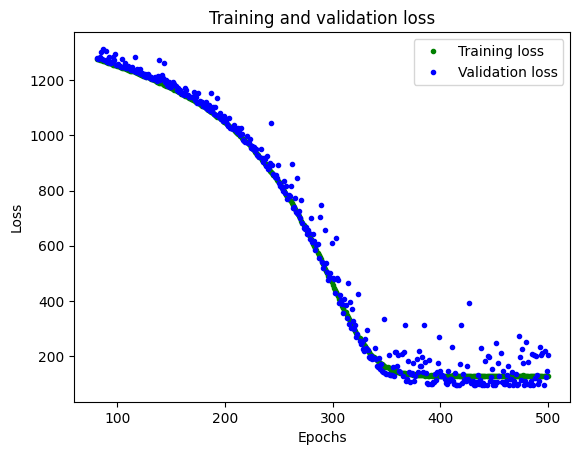

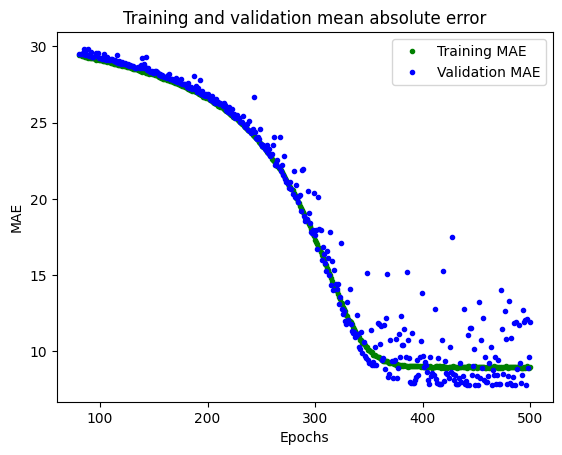

In [76]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)

# Exclude the first few epochs so the graph is easier to read
SKIP = 80

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [69]:
model_2 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(16, activation='relu', input_shape=(2,)))

# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Show a summary of the model
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                48        
                                                                 
 dense_33 (Dense)            (None, 16)                272       
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [70]:
history_2 = model_2.fit(X_train, y_train, epochs=500, batch_size=16,
                    validation_data=(X_val, y_val))

Epoch 1/500
899/899 [==============================] - 2s 2ms/step - loss: 98058.4219 - mae: 163.2603 - val_loss: 1448.6481 - val_mae: 31.1704
Epoch 2/500
899/899 [==============================] - 2s 2ms/step - loss: 1297.8318 - mae: 29.4153 - val_loss: 1253.9851 - val_mae: 29.1151
Epoch 3/500
899/899 [==============================] - 2s 3ms/step - loss: 1268.8275 - mae: 29.1335 - val_loss: 1274.0807 - val_mae: 29.1183
Epoch 4/500
899/899 [==============================] - 2s 2ms/step - loss: 1256.6450 - mae: 28.8792 - val_loss: 1442.5156 - val_mae: 31.0283
Epoch 5/500
899/899 [==============================] - 2s 2ms/step - loss: 1241.1553 - mae: 28.6692 - val_loss: 1232.7048 - val_mae: 28.6566
Epoch 6/500
899/899 [==============================] - 2s 2ms/step - loss: 1229.9564 - mae: 28.4681 - val_loss: 1223.9769 - val_mae: 28.4248
Epoch 7/500
899/899 [==============================] - 2s 2ms/step - loss: 1218.3212 - mae: 28.3236 - val_loss: 1241.2084 - val_mae: 28.7346
Epoch 8/500

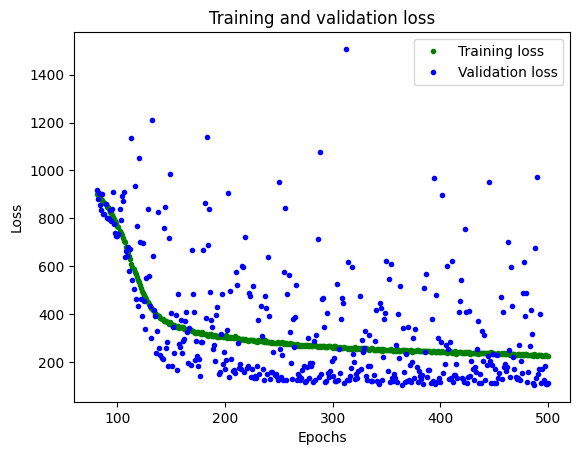

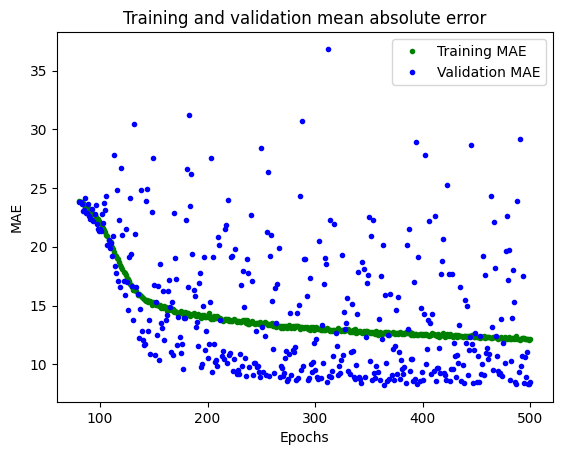

In [72]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

# Exclude the first few epochs so the graph is easier to read
SKIP = 80

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [79]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_1)
tflite_model = converter.convert()

# Save the model to disk
open("weather_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which includes quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in X_test:
    # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()

# Save the model to disk
open("weather_model_quantized.tflite", "wb").write(tflite_model)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:789: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


3104

In [80]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i weather_model_quantized.tflite > weather_model_quantized.cc
# Print the source file
!cat weather_model_quantized.cc

unsigned char weather_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x8c, 0x00, 0x00, 0x00, 0xe4, 0x00, 0x00, 0x00,
  0xc0, 0x03, 0x00, 0x00, 0xd0, 0x03, 0x00, 0x00, 0x94, 0x0b, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0xee, 0xfb, 0xff, 0xff, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x3c, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,
  0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x90, 0xff, 0xff, 0xff,
  0x0b, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x64, 0x65, 0x6e, 0x73, 0x65, 0x5f, 0x33, 0x34, 0x00, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0xc6, 0xfc,